In [1]:
pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn scipy matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [5]:
data=pd.read_csv("/Users/premkumar/Downloads/heart_edited.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,62,0,0,160,164,0,0,145,0,0,1
1,62,0,0,140,268,0,0,160,0,0,1
2,56,0,0,200,288,1,0,133,1,0,1
3,57,1,0,156,173,0,0,119,1,0,1
4,53,1,0,140,203,1,0,155,1,0,1


In [6]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.756032,0.840483,133.022788,244.635389,0.167560,0.931635,140.226542,0.384718,1.410188,0.477212
std,9.505888,0.429762,0.958198,17.282750,59.153524,0.373726,0.631939,24.524107,0.486855,0.598076,0.499816
min,28.000000,0.000000,0.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,207.250000,0.000000,1.000000,122.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,237.000000,0.000000,1.000000,140.000000,0.000000,1.000000,0.000000
75%,59.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,160.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,2.000000,1.000000


In [7]:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             746 non-null    int64
 1   Sex             746 non-null    int64
 2   ChestPainType   746 non-null    int64
 3   RestingBP       746 non-null    int64
 4   Cholesterol     746 non-null    int64
 5   FastingBS       746 non-null    int64
 6   RestingECG      746 non-null    int64
 7   MaxHR           746 non-null    int64
 8   ExerciseAngina  746 non-null    int64
 9   ST_Slope        746 non-null    int64
 10  HeartDisease    746 non-null    int64
dtypes: int64(11)
memory usage: 64.2 KB


Text(0, 0.5, 'Age')

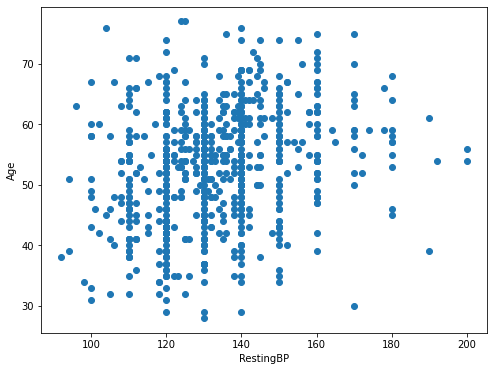

In [8]:
#Examining the correlation between age and resting blood pressure
plt.figure(figsize=(8,6))
plt.scatter(data['RestingBP'],data['Age'])
plt.xlabel("RestingBP")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

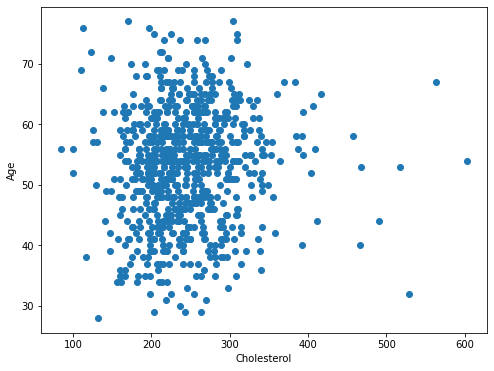

In [9]:
#Examining the relationship between age and cholestrol level
plt.figure(figsize=(8,6))
plt.scatter(data['Cholesterol'],data['Age'])
plt.xlabel("Cholesterol")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

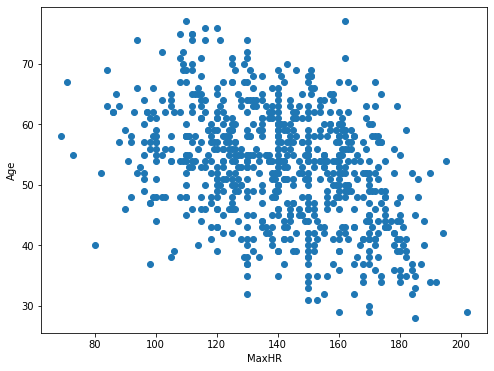

In [10]:
#Examining the relationship between age and MaxHR
plt.figure(figsize=(8,6))
plt.scatter(data['MaxHR'],data['Age'])
plt.xlabel("MaxHR")
plt.ylabel("Age")

Unique Chest Pain Types: {'0': 'ASY', '1': 'ATA', '2': 'NAP', '3': 'TA'}


<Figure size 864x432 with 0 Axes>

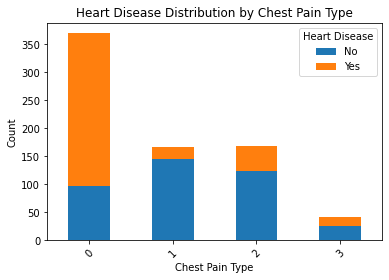

In [11]:
#dividing the data points by chest pain type and defining them
chest_pain_types = data['ChestPainType'].unique()
chest_pain_types = {
    "0": "ASY",
    "1": "ATA",
    "2": "NAP",
    "3": "TA"
}
print("Unique Chest Pain Types:", chest_pain_types)
chest_pain_heart_disease_counts = data.groupby(['ChestPainType', 'HeartDisease']).size().unstack(fill_value=0)
#plotting the graph
plt.figure(figsize=(12, 6))
chest_pain_heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

Unique RestingECG Categories: {'0': 'LVH', '1': 'Normal', '2': 'ST'}


<Figure size 720x432 with 0 Axes>

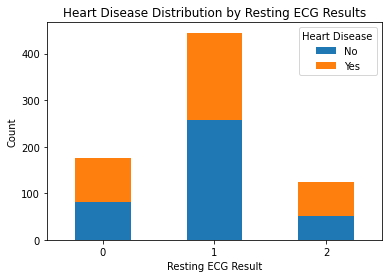

In [12]:
#Relationship between Resting ECG and Heart Disease
resting_ecg_categories = data['RestingECG'].unique()
resting_ecg_categories = {
    "0": "LVH",
    "1": "Normal",
    "2": "ST"
}
print("Unique RestingECG Categories:", resting_ecg_categories)
resting_ecg_heart_disease_counts = data.groupby(['RestingECG', 'HeartDisease']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
resting_ecg_heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Resting ECG Results')
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

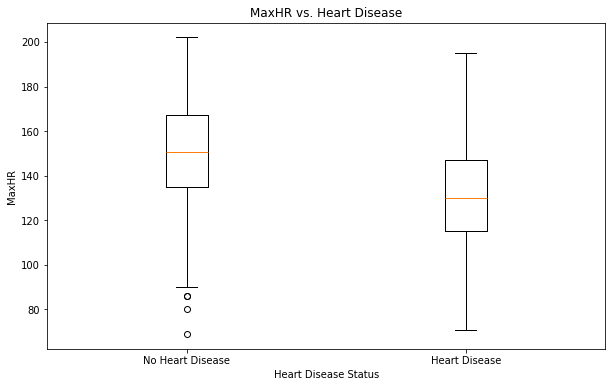

In [13]:
#dividing the max heart rate data points by presence of heart disease
maxhr_no_heart_disease = data[data['HeartDisease'] == 0]['MaxHR']
maxhr_heart_disease = data[data['HeartDisease'] == 1]['MaxHR']

mean_maxhr_no_heart_disease = maxhr_no_heart_disease.mean()
median_maxhr_no_heart_disease = maxhr_no_heart_disease.median()
std_maxhr_no_heart_disease = maxhr_no_heart_disease.std()

mean_maxhr_heart_disease = maxhr_heart_disease.mean()
median_maxhr_heart_disease = maxhr_heart_disease.median()
std_maxhr_heart_disease = maxhr_heart_disease.std()
#plotting the graph
plt.figure(figsize=(10, 6))
plt.boxplot([maxhr_no_heart_disease, maxhr_heart_disease], labels=['No Heart Disease', 'Heart Disease'])
plt.title('MaxHR vs. Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('MaxHR')
plt.show()

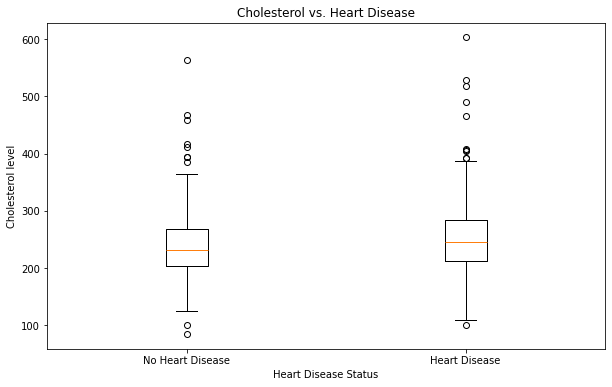

In [14]:
#segregating the cholesterol data points into individuals with and without heart disease
cholesterol_no_heart_disease = data[data['HeartDisease'] == 0]['Cholesterol']
cholesterol_heart_disease = data[data['HeartDisease'] == 1]['Cholesterol']
#characteristics of the cholesterol data points without heart disease
mean_cholesterol_no_heart_disease = cholesterol_no_heart_disease.mean()
median_cholesterol_no_heart_disease = cholesterol_no_heart_disease.median()
std_cholesterol_no_heart_disease = cholesterol_no_heart_disease.std()
#characteristics of the cholesterol data points with heart disease
mean_cholesterol_heart_disease = cholesterol_heart_disease.mean()
median_cholesterol_heart_disease = cholesterol_heart_disease.median()
std_cholesterol_heart_disease = cholesterol_heart_disease.std()
plt.figure(figsize=(10, 6))
plt.boxplot([cholesterol_no_heart_disease, cholesterol_heart_disease], labels=['No Heart Disease', 'Heart Disease'])
plt.title('Cholesterol vs. Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('Cholesterol level')
plt.show()

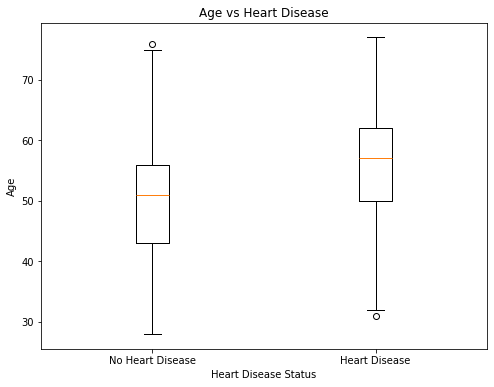

In [15]:
#segregating the age data points into individuals with and without heart disease
age_no_heart_disease = data[data['HeartDisease'] == 0]['Age']
age_heart_disease = data[data['HeartDisease'] == 1]['Age']
#plotting the chart
plt.figure(figsize=(8, 6))
plt.boxplot([age_no_heart_disease, age_heart_disease], labels=['No Heart Disease', 'Heart Disease'])
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.show()

In [16]:
scalar = MinMaxScaler()

In [17]:
#preprocessing the data
data[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']] = scalar.fit_transform(data[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']])

In [18]:
#Defining the outputs and inputs
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [19]:
#Setting the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2)

In [20]:
#Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Accuracy of the model
acc_log = round(logreg.score(X_train, y_train) * 100, 3)
log = round(logreg.score(X_test, y_test) * 100, 3)
print("Training accuracy: ", acc_log)
print("Testing accuracy: ", log)

Training accuracy:  85.738
Testing accuracy:  82.667


In [21]:
#Random forest classifier model
RandomForestClassifier = RandomForestClassifier(n_estimators=5)
RandomForestClassifier.fit(X_train, y_train)
acc_random_forest = round(RandomForestClassifier.score(X_train, y_train) * 100, 3) 
#Accuracy of the model
random_forest = round(RandomForestClassifier.score(X_test, y_test) * 100, 3) 
print("Training accuracy: ", acc_random_forest)
print("Testing accuracy: ", random_forest)

Training accuracy:  98.322
Testing accuracy:  85.333


In [22]:
#Support vector classifier
SVC = SVC(kernel= 'linear', C= 1)
SVC.fit(X_train, y_train)
acc_svc = round(SVC.score(X_train, y_train) * 100, 3)
#Accuracy of the model
svc = round(SVC.score(X_test, y_test) * 100, 3)
print("Training accuracy: ", acc_svc)
print("Testing accuracy: ", svc)

Training accuracy:  87.248
Testing accuracy:  84.0


In [23]:
# Age input
while True:
    try:
        input_age = int(input("Specify the age of the individual=> "))
        if input_age < 28:
            print("This age is too low. Select a higher age")
        elif input_age > 77:
            print("This age is too high. Select a lower age")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The age must be a positive number")

# Sex input
while True:
    try:
        input_sex = int(input("Specify the gender of the individual. If they are male, write 1. If they are female, write 0. => "))
        if input_sex not in (0, 1):
            print("The value must be 0 or 1")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The sex must be 0 or 1")

# Chest pain type input
while True:
    try:
        input_chest_pain_type = int(input("Specify the type of chest pain experienced by the individual. For ASY, write 0. For ATA, write 1. For NAP, write 2. For TA, write 3. => "))
        if input_chest_pain_type not in (0, 1, 2, 3):
            print("The value must be between 0 and 3")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The chest pain type must be between 0 and 3")

# Resting blood pressure input
while True:
    try:
        input_resting_blood_pressure = int(input("Specify the resting blood pressure of the individual=> "))
        if input_resting_blood_pressure < 98:
            print("The value given is too low")
        elif input_resting_blood_pressure > 200:
            print("The value given is too high")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The resting blood pressure must be a positive integer")

# Cholesterol level input
while True:
    try:
        input_cholesterol = int(input("Specify the cholesterol level of the individual=> "))
        if input_cholesterol < 92:
            print("The cholesterol value is too low")
        elif input_cholesterol > 603:
            print("The cholesterol value is too high")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The cholesterol level must be a positive integer")
        
# Fasting Blood Sugar input
while True:
    try:
        input_fastingBS = int(input("Is the fasting blood sugar of the individual above 120mg/dL? If yes, write 1. If no, write 0. => "))
        if input_fastingBS not in (0, 1):
            print("The value must be 0 or 1")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The value must be 0 or 1")

# Resting ECG input
while True:
    try:
        input_restingECG = int(input("Specify the resting electrocardiogram of the individual. 0 is LVH, 1 is Normal, 2 is ST => "))
        if input_restingECG not in (0, 1, 2):
            print("The value must be 0, 1, or 2")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The value must be 0, 1, or 2")

# Maximum Heart Rate input
while True:
    try:
        input_maxHR = int(input("Specify the maximum heart rate of the individual=> "))
        if input_maxHR < 69:
            print("The value given is too low")
        elif input_maxHR > 202:
            print("The value given is too high")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The value must be a positive integer")

# Exercise-Induced Angina input
while True:
    try:
        input_exercise_angina = int(input("Does the individual have exercise-induced angina? If yes, write 1. If no, write 0. => "))
        if input_exercise_angina not in (0, 1):
            print("The value must be 0 or 1")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The value must be 0 or 1")

# ST Slope input
while True:
    try:
        input_ST_slope = int(input("Specify the ST slope. 0 is Down, 1 is Flat, 2 is Up => "))
        if input_ST_slope not in (0, 1, 2):
            print("The value must be 0, 1, or 2")
        else:
            break  # Break the loop if input is valid
    except ValueError:
        print("The value must be 0, 1, or 2")


Specify the age of the individual=> 75
Specify the gender of the individual. If they are male, write 1. If they are female, write 0. => 1
Specify the type of chest pain experienced by the individual. For ASY, write 0. For ATA, write 1. For NAP, write 2. For TA, write 3. => -500
The value must be between 0 and 3
Specify the type of chest pain experienced by the individual. For ASY, write 0. For ATA, write 1. For NAP, write 2. For TA, write 3. => 0
Specify the resting blood pressure of the individual=> 130
Specify the cholesterol level of the individual=> 200
Is the fasting blood sugar of the individual above 120mg/dL? If yes, write 1. If no, write 0. => 1
Specify the resting electrocardiogram of the individual. 0 is LVH, 1 is Normal, 2 is ST => 0
Specify the maximum heart rate of the individual=> 100
Does the individual have exercise-induced angina? If yes, write 1. If no, write 0. => 1
Specify the ST slope. 0 is Down, 1 is Flat, 2 is Up => 0


In [26]:
#Associating the custom input values with the X value of the model
data=pd.DataFrame({
    "Age": [input_age],
    "Sex": [input_sex],
    "ChestPainType": [input_chest_pain_type],
    "RestingBP": [input_resting_blood_pressure],
    "Cholesterol": [input_cholesterol],
    "FastingBS": [input_fastingBS],
    "RestingECG": [input_restingECG],
    "MaxHR": [input_maxHR],
    "ExerciseAngina": [input_exercise_angina],
    "ST_Slope": [input_ST_slope]
 })

#Using the Random forest classifier model to predict the probability of heart disease
predicted_prob = RandomForestClassifier.predict_proba(data)[0, 1]
#Setting thresholds to categorise the probabilities into likely, unlikely and moderate
low_threshold = 0.3
high_threshold = 0.7
#Providing healthcare advice to patients alongside the diagnosis
if predicted_prob >= high_threshold:
    print("Likelihood of heart disease: High")
    print("1. Medical Consultation\n2. Make healthy lifestyle changes such as diet modification, regular exercise, quit smoking and alcohol.\n3. Schedule regular medical check-ups as recommended by the healthcare provider to monitor condition and adjust treatment plan if necessary.\n4. To stay mentally healthy during these difficult times, seek emotional support from friends, family or others. ")
elif predicted_prob >= low_threshold:
    print("Likelihood of heart disease: Moderate")
    print("1. Consult a healthcare professional to assess your specific risk factors, overall health, and develop a personalized plan.\n2. Your healthcare provider will evaluate your risk factors, which may include family history, age, cholesterol levels, blood pressure, smoking habits, etc.\n 3. Preventive Measures: Consider getting vaccinated against diseases like influenza and pneumonia, as these can have a significant impact on individuals with heart disease.")
else:
    print("Likelihood of heart disease: Low")
    print("1. Even if the risk is low, schedule regular check-ups with your healthcare provider as the model is not fully accurate. This allows for early detection of any potential risk factors.\n2. Continue to educate yourself about heart health and stay aware of any family history or genetic predispositions that could increase your risk in the future.\n3. Maintain an active lifestyle and avoid prolonged periods of sitting or inactivity. Even if you have a low risk, regular physical activity benefits overall health.")

Likelihood of heart disease: Moderate
1. Consult a healthcare professional to assess your specific risk factors, overall health, and develop a personalized plan.
2. Your healthcare provider will evaluate your risk factors, which may include family history, age, cholesterol levels, blood pressure, smoking habits, etc.
 3. Preventive Measures: Consider getting vaccinated against diseases like influenza and pneumonia, as these can have a significant impact on individuals with heart disease.


In [25]:
# Dataset - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
# Youtube video - https://www.youtube.com/watch?v=_uQrJ0TkZlc (Used mainly for basic python)